<a href="https://colab.research.google.com/github/marcinwolter/Autoencoder/blob/main/Autoencoder_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'> **Outlier detection with autoencoders**

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction.

<img src='https://stackabuse.s3.amazonaws.com/media/image-reconstruction-and-denoising-with-autoencoders-in-python-and-keras-3.png' width=500px>

# **Simple autoencoder**

In [2]:
import keras
import numpy as np
np.random.seed(10)

In [3]:
import numpy as np
from tensorflow.keras import layers
from keras.models import Model


# Read MNIST data

In [38]:
data = np.load("new_signal_data.npy", allow_pickle=True)
keys = list(data.item().keys())
max_length = max([len(data.item().get(key)) for key in keys])
max_length
traning_data = {}

for key in keys:
    traning_data[key] = data.item().get(key)
def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo
training_data = padding_data(traning_data)
traning_matrix = np.array([values for values in traning_data.values()])
print(traning_matrix.shape)
traning_matrix = traning_matrix.T
print(traning_matrix.shape)

(183, 22876)
(22876, 183)


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(traning_matrix, test_size=0.3, random_state=42)


# Reshape data (only if you use the fully connected network)

In [40]:
print(x_train.shape) #przed transponowaniem
print(x_test.shape)  #przed transponowaniem

(16013, 183)
(6863, 183)


# Hyperparameters

In [41]:
encoding_dim = 32 # valid for fully connected network only
batch_size = 128
epochs = 30 #100

# **Fully connected autoencoder**

In [42]:
input_shape = x_train.shape[1]
# This is our input image
input_img = layers.Input(shape=(input_shape,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
#encoded = layers.Dense(32, activation='relu')(encoded)

#encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dropout(0.05)(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
#decoded = layers.Dense(128, activation='relu')(decoded)

#decoded = layers.Dense(518, activation='relu')(decoded)
decoded = layers.Dropout(0.05)(decoded)
decoded = layers.Dense(input_shape, activation='sigmoid')(decoded)


# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#encoder = Model(input_img, encoded)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 183)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        94,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 183)            │        93,879 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,671 (1.78 MB)

 Trainable params: 467,671 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

# **Convolutional autoencoder**

Should work better than the fully connected one

# Train the autoencoder

In [43]:
input_shape

183

In [44]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, x_test))

Epoch 1/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.5497 - val_loss: 0.4967
Epoch 2/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4942 - val_loss: 0.4825
Epoch 3/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4832 - val_loss: 0.4782
Epoch 4/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4795 - val_loss: 0.4761
Epoch 5/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4774 - val_loss: 0.4749
Epoch 6/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4763 - val_loss: 0.4741
Epoch 7/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4753 - val_loss: 0.4734
Epoch 8/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4745 - val_loss: 0.4730
Epoch 9/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4742 - val_loss: 0.4720
Epoch 10/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4736 - val_loss: 0.4718
Epoch 11/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4734 - val_loss: 0.4715
Epoch 12/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 

# Plot history

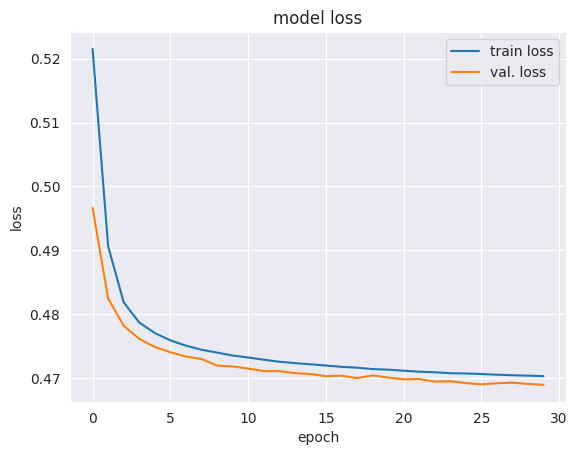

In [45]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','val. loss'], loc='upper right')
plt.show()

# Plot digits

In [46]:
decoded_data = autoencoder.predict(x_test)

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
def bins(n, list):
    bins = []

    list = sorted(list)

    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n


    return bins
def paint(key, m, list):
    biny = bins(m, list)
    plt.hist(list, bins=biny, color='blue')
    plt.title(keys[key])
    plt.show()
decoded_data.shape

(6863, 183)

# Read fashion mnist

In [48]:
data = np.load("new_background_data.npy", allow_pickle=True)
keys = list(data.item().keys())
max_length = max([len(data.item().get(key)) for key in keys])
signal_data = {}

for key in keys:
    signal_data[key] = data.item().get(key)


def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo


signal_data = padding_data(signal_data)
signal_matrix = np.array([values for values in signal_data.values()])
print(signal_matrix.shape)
signal_matrix = signal_matrix.T

(183, 108457)


In [49]:
#clean_signal_matrix = signal_matrix[:,~np.all(np.isnan(signal_matrix), axis=0)]


In [50]:
#clean_signal_matrix.shape

# Reshape fashion data (only if you use the fully connected network)

In [51]:
xs_train, xs_test = train_test_split(signal_matrix, test_size=0.2, random_state=42)
print(xs_train.shape)
print(xs_test.shape)

(86765, 183)
(21692, 183)


# Calculate the losses for mnist digits and fasion mnist and plot a histogram

In [52]:
signal_output = autoencoder.predict(xs_test)

678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


### Reshape only if you use the convolutional autoencoder

In [53]:
def paint(key, m, list, list2):
    fig = plt.figure()
    biny = bins(m, list2)
    plt.hist(list, bins=biny, color='blue')
    plt.hist(list2, bins=biny, color='green', alpha=0.5)
    plt.title(keys[key])
    plt.show()
    return fig

In [54]:
losses = keras.losses.mean_squared_error(decoded_data, x_test)
#print(losses[0:20])
fashion_losses = keras.losses.mean_squared_error(signal_output, xs_test)
#print(fashion_losses[0:20])

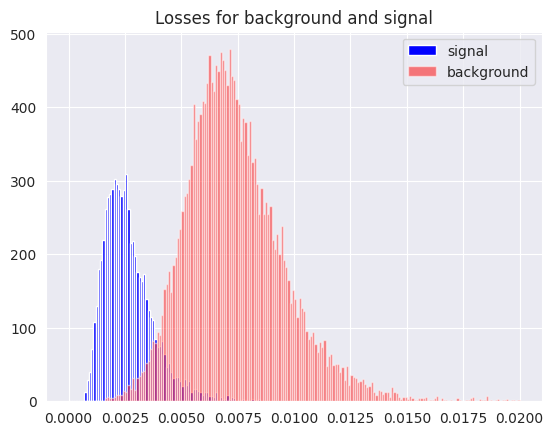

In [56]:
plt.hist(losses,bins=200,range=(0,0.02),label="signal",alpha=1, color='blue')
plt.hist(fashion_losses,bins=200,range=(0,0.02),label="background",alpha=0.5, color='red')
plt.title("Losses for background and signal")
plt.legend()
#plt.yscale('log')
plt.savefig(f'518-128 E:{epochs}, bach:{batch_size}, dim:{encoding_dim}.png')
plt.show()

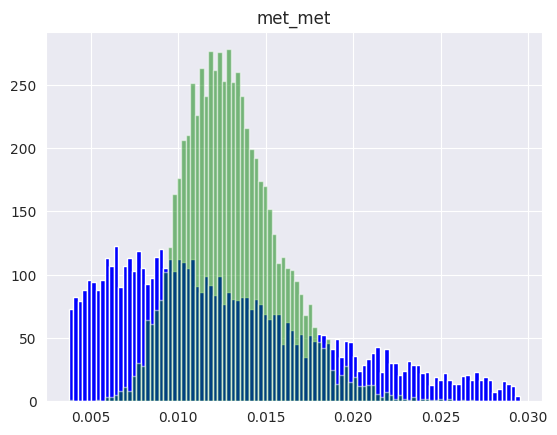

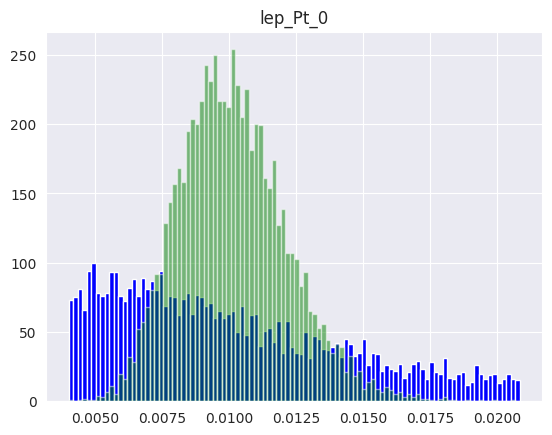

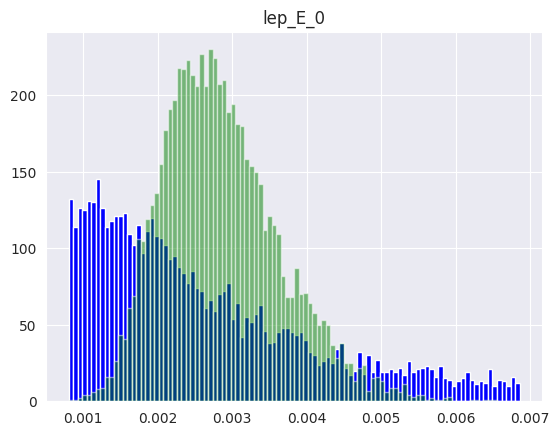

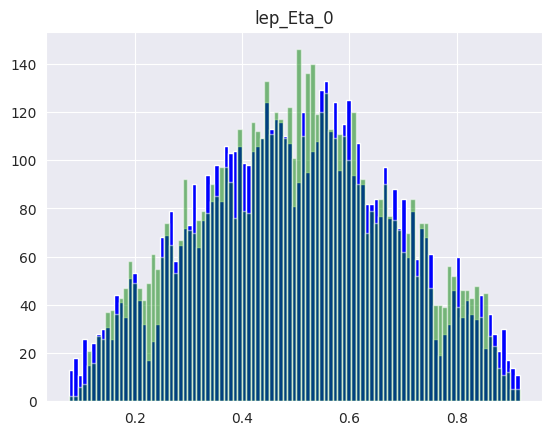

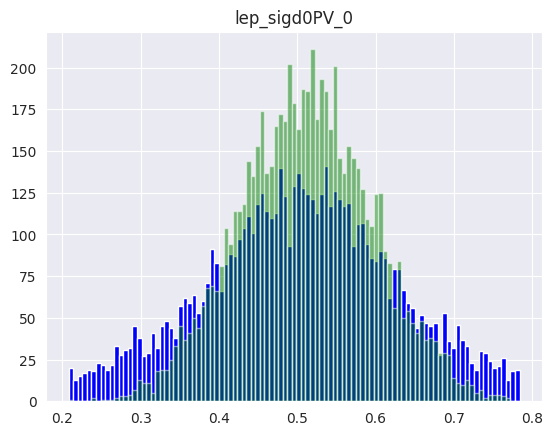

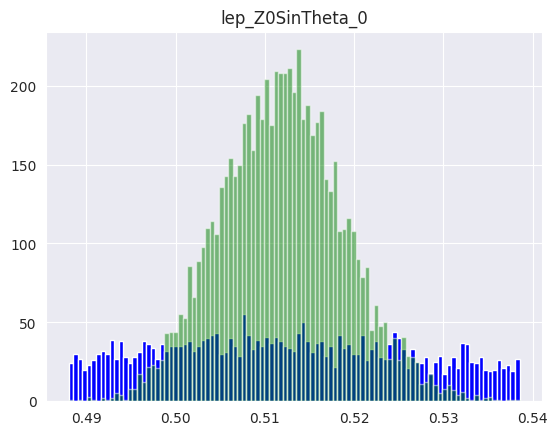

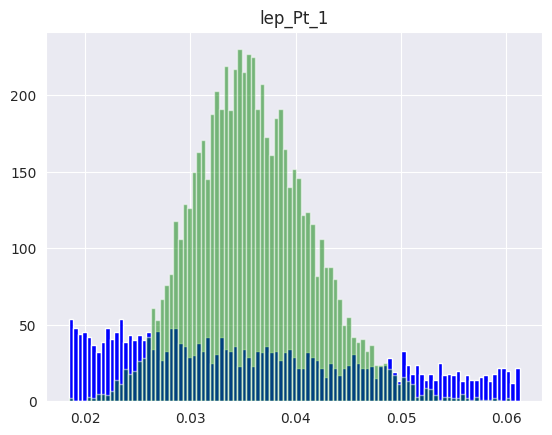

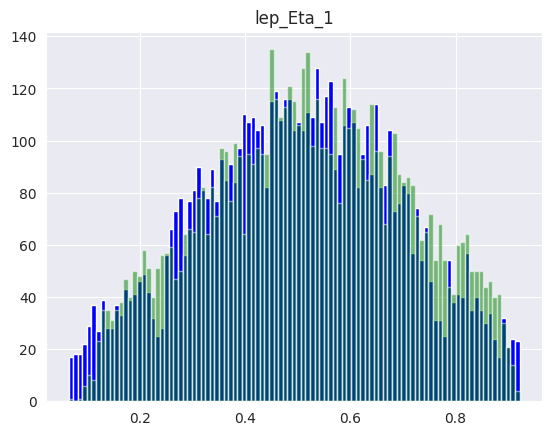

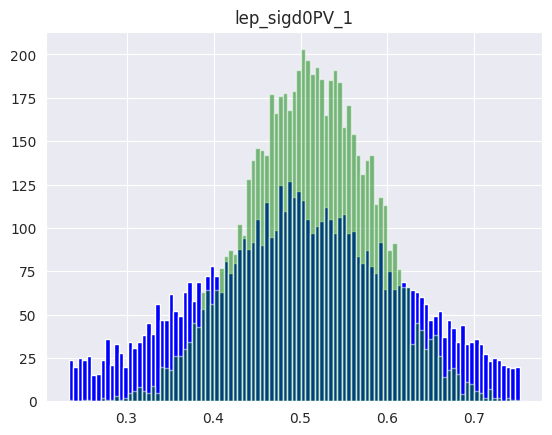

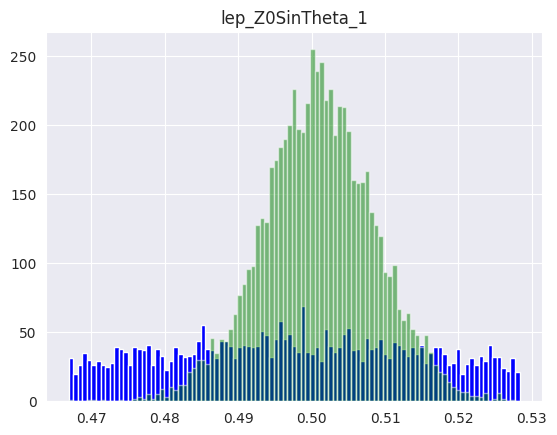

"from matplotlib.backends.backend_pdf import PdfPages\n\npp = PdfPages('plots_after_first_cleaning_background.pdf') #po wyrzuceniu pasujacych wykresow\nfor i in range(10):\n    fig = paint(i, 100, x_test[:,i], decoded_data[:,i])\n    plt.savefig(pp, format='pdf')\npp.close()"

In [57]:
for i in range(10):
    paint(i, 100, x_test[:,i], decoded_data[:,i])

'''from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('plots_after_first_cleaning_background.pdf') #po wyrzuceniu pasujacych wykresow
for i in range(10):
    fig = paint(i, 100, x_test[:,i], decoded_data[:,i])
    plt.savefig(pp, format='pdf')
pp.close()'''

In [ ]:
pp = PdfPages('plots_after_first_cleaning_signal.pdf') #po wyrzuceniu pasujacych wykresow
for i in range(input_shape):
    fig = paint(i, 100, xs_test[:,i], signal_output[:,i])
    plt.savefig(pp, format='pdf')
pp.close()

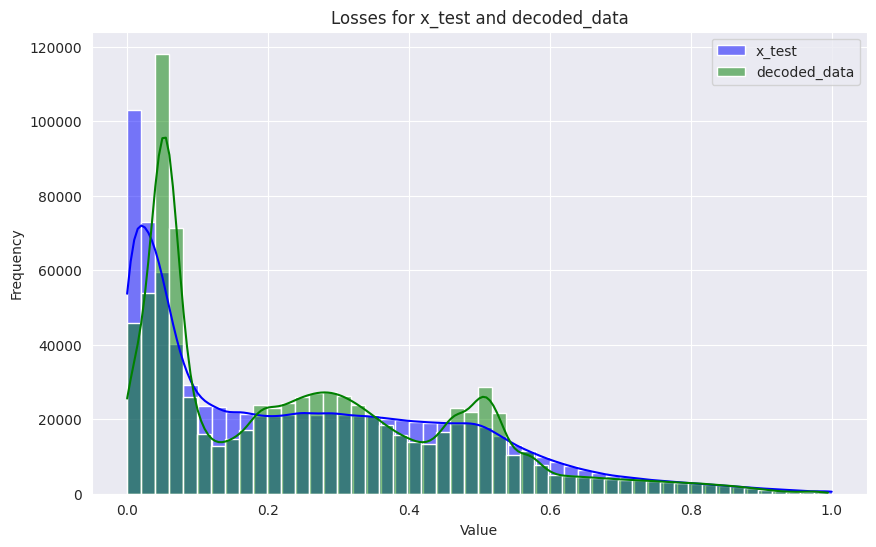

In [85]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(x_test.flatten(), bins=50, kde=True, color='blue', label='x_test', alpha=0.5)
sns.histplot(decoded_data.flatten(), bins=50, kde=True, color='green', label='decoded_data', alpha=0.5)
plt.title('Losses for x_test and decoded_data')
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [86]:
def visualize_reconstruction_errors(autoencoder, data):
    decoded_data = autoencoder.predict(data)
    errors = np.mean(np.square(data - decoded_data), axis=1)
    plt.figure(figsize=(10, 5))
    plt.hist(errors, bins=50)
    plt.xlabel('Reconstruction error')
    plt.ylabel('Frequency')
    plt.show()

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


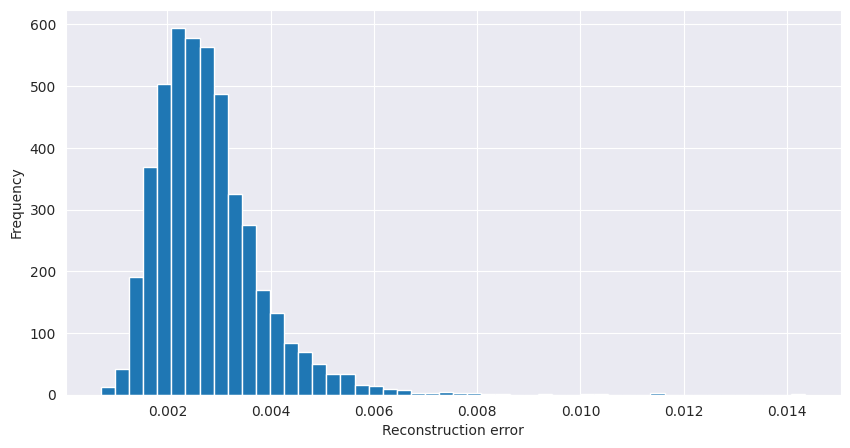

In [87]:
visualize_reconstruction_errors(autoencoder, xs_test)

# Outlier detection

The autoencoder is trained on mnist hand-written digits. Therefore it does not reproduce the fashion elements well, therefore the losses are much higher than for mnist digits. Putting a cut on losses allows to identify the outliers.

### Remark
The autoencoder was never trained on "fashion" images.